<a href="https://colab.research.google.com/github/nguyenhuuduong20062002/NguyenHuuDuong20104025/blob/main/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/BTVN/Food

/content/drive/MyDrive/Colab Notebooks/BTVN/Food


In [3]:
import tensorflow as tf
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.0/255)
food_train = train_datagen.flow_from_directory(
    './Train/',
    target_size= (200, 200),
    batch_size = 16,
    class_mode = 'categorical')
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1.0/255)


food_test = test_data.flow_from_directory(
    './Validation/', 
    target_size= (200, 200), 
    batch_size = 16,
    class_mode = 'categorical')

Found 3008 images belonging to 10 classes.
Found 360 images belonging to 10 classes.


In [4]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import layers
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(200,200,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [5]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics=["accuracy"])
model.fit(food_train, epochs=10, batch_size=128)

Epoch 1/10
188/188 [==============================] - 1488s 8s/step - loss: 2.4313 - accuracy: 0.2134
Epoch 2/10
188/188 [==============================] - 211s 1s/step - loss: 1.5438 - accuracy: 0.4914
Epoch 3/10
188/188 [==============================] - 208s 1s/step - loss: 0.9336 - accuracy: 0.6988
Epoch 4/10
188/188 [==============================] - 207s 1s/step - loss: 0.4477 - accuracy: 0.8587
Epoch 5/10
188/188 [==============================] - 209s 1s/step - loss: 0.2146 - accuracy: 0.9395
Epoch 6/10
188/188 [==============================] - 212s 1s/step - loss: 0.1405 - accuracy: 0.9571
Epoch 7/10
188/188 [==============================] - 212s 1s/step - loss: 0.0918 - accuracy: 0.9757
Epoch 8/10
188/188 [==============================] - 210s 1s/step - loss: 0.1167 - accuracy: 0.9721
Epoch 9/10
188/188 [==============================] - 209s 1s/step - loss: 0.0872 - accuracy: 0.9801
Epoch 10/10
188/188 [==============================] - 209s 1s/step - loss: 0.1053 - accur

In [6]:

model.save('Food.h5')

In [7]:
from keras.models import load_model
model_food=load_model('Food.h5')

1/1 [==============================] - 0s 145ms/step
Đây là : Com tam


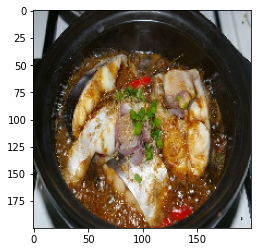

In [9]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/5.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
class_name=['Banh beo','Banh bot loc','Banh mi','Bun cha','Cha lua','Chao long',
            'Com tam','Goi cuon','Nem chua','Pho']
f= int(np.argmax(result,axis=1))
print("Đây là :", class_name[f])

1/1 [==============================] - 0s 36ms/step
Đây là : Banh bot loc


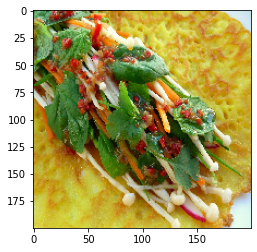

In [10]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/Banh xeo2.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
class_name=['Banh beo','Banh bot loc','Banh mi','Bun cha','Cha lua','Chao long',
            'Com tam','Goi cuon','Nem chua','Pho']
f= int(np.argmax(result,axis=1))
print("Đây là :", class_name[f])

1/1 [==============================] - 0s 34ms/step
Đây là : Banh beo


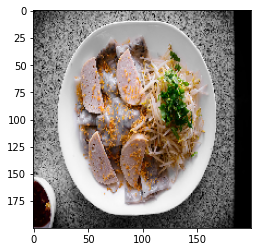

In [11]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/66.jpg',target_size = (200,200))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_food.predict(img)
class_name=['Banh beo','Banh bot loc','Banh mi','Bun cha','Cha lua','Chao long',
            'Com tam','Goi cuon','Nem chua','Pho']
f= int(np.argmax(result,axis=1))
print("Đây là :", class_name[f])

In [14]:
!jupyter nbconvert --to html "/content/Food.ipynb"

[NbConvertApp] Converting notebook /content/Food.ipynb to html
[NbConvertApp] Writing 746810 bytes to /content/Food.html
